# Data Description

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models

# Import Required Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [38]:
#importing dataset from github

df=pd.read_csv('https://github.com/dsrscientist/DSData/raw/master/Telecom_customer_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Totally, We have a 21 columns in the dataset and Churn column is the target column.

In [3]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

The above code will help me to view all the columns and rows whenever is required.

# Checking Data type and Shape

In [31]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
df.shape

(7043, 21)

In [6]:
df=df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


From the above info - we can clearly see there is null value in 7 columns this decision come from the above info because each column should contain 614 rows if not then it have null value

# Checking Unique Value only in doubtfull column

In [39]:
df["TotalCharges"].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In the above data type is showig as Object but it is continuous data. I think we have a space in the column. Lets check

In [40]:
df.loc[df["TotalCharges"]==" "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [41]:
df["TotalCharges"]=df["TotalCharges"].replace(" ",np.nan)

In [42]:
df["TotalCharges"]=df["TotalCharges"].astype(float)

In [44]:
df["TotalCharges"]=df["TotalCharges"].fillna(np.mean(df["TotalCharges"]))

In [45]:
df=df.drop(['customerID'],axis=1)
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

We have successfully removed that customer_ID columns from the dataset because here no use to contain the ID details for upcoming step.

In [46]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [47]:
df.shape

(7043, 20)

We have a 7043 rows and 20 columns in the dataset now.

# Checking Null Value

In [48]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

We don't have a null value in the dataset. However, I will ensure with heatmap in next step.

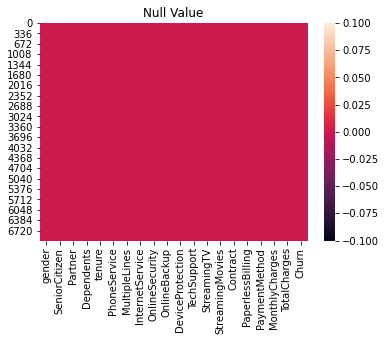

In [49]:
sns.heatmap(df.isnull())
plt.title("Null Value")
plt.show()

# Visualization of Data:

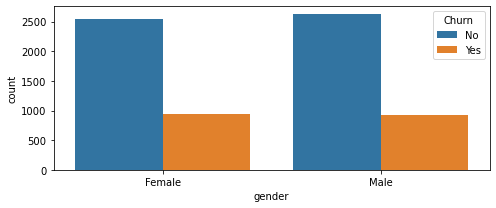

In [50]:
fig = plt.figure(figsize=(7,3))
sns.countplot('gender', hue='Churn', data=df)
plt.tight_layout()
plt.show()

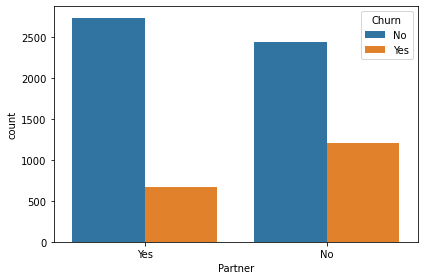

In [51]:
sns.countplot('Partner', hue='Churn', data=df)
plt.tight_layout()
plt.show()

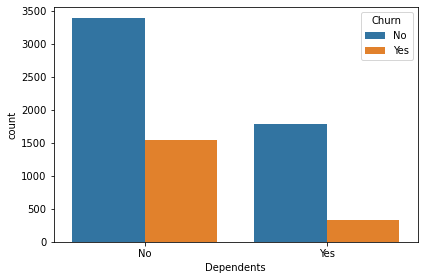

In [52]:
sns.countplot('Dependents', hue='Churn', data=df)
plt.tight_layout()
plt.show()

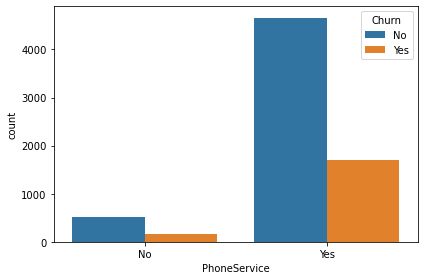

In [54]:
sns.countplot('PhoneService', hue='Churn', data=df)
plt.tight_layout()
plt.show()

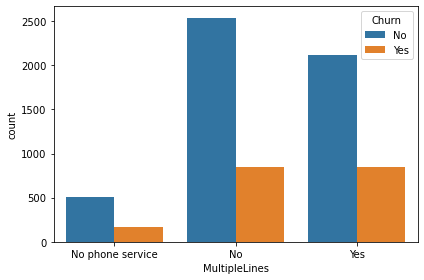

In [56]:
sns.countplot('MultipleLines', hue='Churn', data=df)
plt.tight_layout()
plt.show()

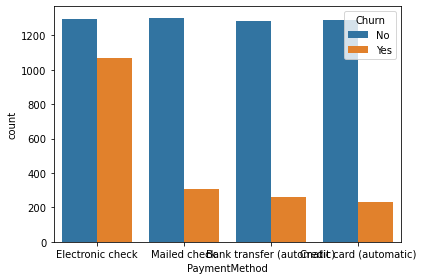

In [57]:
sns.countplot('PaymentMethod', hue='Churn', data=df)
plt.tight_layout()
plt.show()

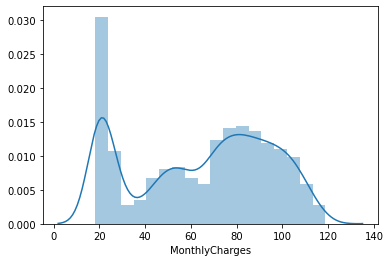

In [64]:
A=sns.distplot(df["MonthlyCharges"],kde=True)

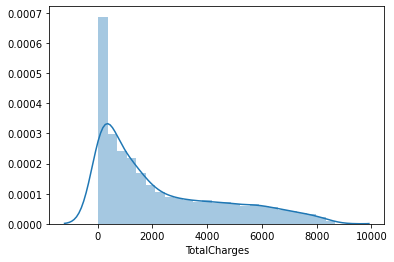

In [65]:
B=sns.distplot(df["TotalCharges"],kde=True)

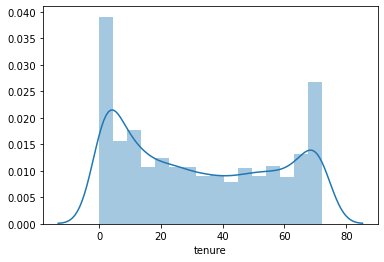

In [66]:
C=sns.distplot(df["tenure"],kde=True)

# Encoding the Dataframe:

In [58]:
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=OE.fit_transform(df[i].values.reshape(-1,1)).astype(int)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


We are not changing all the columns for Ordinal encoder becasue we have only eighteen columns as Ordinal encoder hence we did only for that five columns.

# Describe Dataset

In [59]:
#Statistical Summary
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,2283.300441,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,2265.000258,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,402.225000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1400.550000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,3786.600000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


We have a outlier and skewness. So we will check in further step

# Correlation Checking:

In [60]:
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,0.000048,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.102395,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.318812,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.064535,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.824757,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.112851,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.452883,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.175429,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.254308,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.375362,-0.195525


Correlation using heatmap

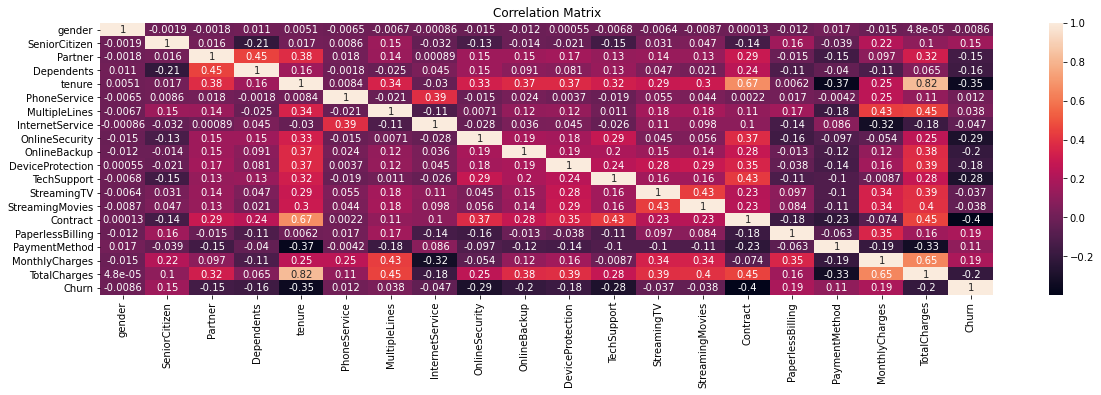

In [62]:
corr_mat=df.corr()
plt.figure(figsize=[20,5])
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show()

# Outcome of Correlation

We can see the positive and negative correlation with the target column. However,charges playing a major role in Churn with 20% of correlation with target variable.

# Outlier Checking 

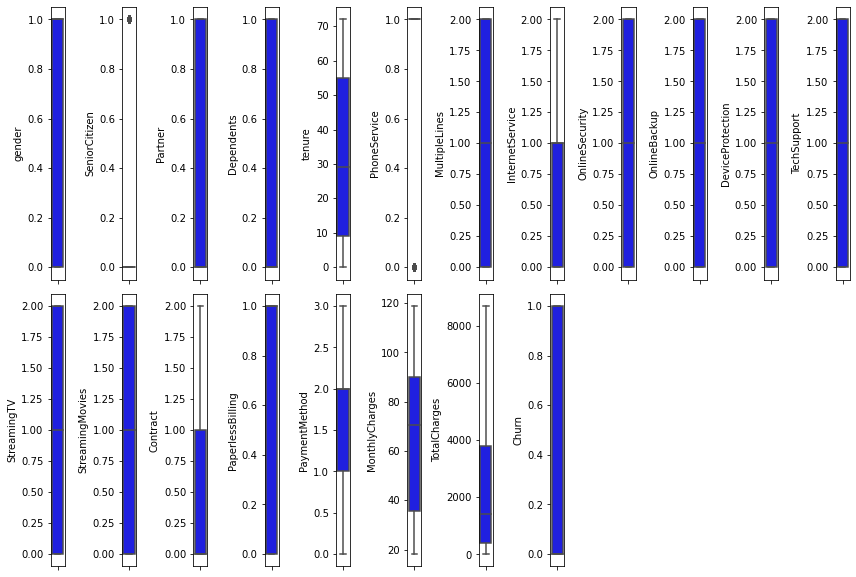

In [63]:
collist=df.columns.values
ncol=12
nrow=6
plt.figure(figsize=(ncol,2*ncol))
for i in range (0,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sns.boxplot(df[collist[i]],color='blue',orient='v')
    plt.tight_layout()

In the above - we have a outlier in nine columns which are 'Gender','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History'. So, we will rectify in further step

# Checking Skewness

In [67]:
df.skew()

gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.962394
Churn               1.063031
dtype: float64

We can consider the -/+.5 is standard point. Based on that we don't have skewness here. let me explain.

SeniorCitizen - Category
Dependents - Category
PhoneService - Category
TotalCharges - Target Variable
Churn - Category

These are encoded from objective type - So, we won't consider this for skewness.

# Data Cleaning

# Removing Outlier

In [68]:
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
print(np.where(z>3))

(array([   0,    3,    7,   20,   27,   62,   81,   89,  103,  105,  107,
        114,  116,  129,  131,  133,  168,  180,  185,  187,  206,  211,
        215,  216,  217,  225,  236,  252,  255,  259,  260,  263,  272,
        278,  303,  321,  324,  328,  348,  354,  358,  372,  376,  382,
        387,  398,  424,  431,  435,  452,  465,  481,  488,  495,  498,
        544,  569,  596,  610,  616,  620,  634,  660,  667,  669,  674,
        677,  688,  716,  718,  735,  765,  776,  784,  790,  794,  813,
        829,  843,  847,  859,  866,  873,  875,  877,  884,  893,  917,
        934,  941,  943,  960,  973, 1011, 1018, 1037, 1050, 1051, 1053,
       1072, 1110, 1119, 1122, 1144, 1146, 1150, 1161, 1169, 1182, 1204,
       1221, 1225, 1242, 1255, 1257, 1271, 1278, 1298, 1311, 1326, 1331,
       1333, 1334, 1340, 1349, 1352, 1365, 1379, 1402, 1407, 1416, 1452,
       1479, 1480, 1481, 1500, 1506, 1513, 1519, 1560, 1562, 1581, 1584,
       1614, 1620, 1634, 1637, 1652, 1689, 1692, 1

In [69]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(7043, 20)
(6361, 20)


In [70]:
Loss_percentage=(7043-6361)/7043*100
print(Loss_percentage)

9.683373562402386


Actually, We are having a 10%(rounded Off) dataloss in the dataset which are good to go for further step.

In [71]:
X=df_new.iloc[:,:-1]
Y=df_new.iloc[:,-1]

We are spliting the dataset which are X is feature and Y is target.

In [72]:
from sklearn.preprocessing import StandardScaler
SC=StandardScaler()
x=SC.fit_transform(X)
x

array([[ 0.99263832, -0.44159123, -0.97224479, ...,  1.33544287,
        -0.33661675, -0.2051956 ],
       [ 0.99263832, -0.44159123, -0.97224479, ...,  1.33544287,
        -0.43843231, -0.9707094 ],
       [-1.00741628, -0.44159123, -0.97224479, ...,  0.39969137,
         0.11498455, -0.9520158 ],
       ...,
       [-1.00741628, -0.44159123,  1.02854755, ..., -0.53606013,
         1.18240581,  2.1469324 ],
       [ 0.99263832,  2.26453771,  1.02854755, ...,  1.33544287,
         0.23650636, -0.8854279 ],
       [ 0.99263832, -0.44159123, -0.97224479, ..., -1.47181163,
         1.26287295,  1.92415622]])

# Finding the Model and Random State:

I have choosed the logistic Regression because outcome has a two variable. Hence, I am going with classification Model.

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range (0,100):
    x_train,x_test,Y_train,Y_test = train_test_split(x,Y,test_size=.30,random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,Y_train)
    predrf=LR.predict(x_test)
    acc = accuracy_score(Y_test, predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best Accuracy is",maxAccu*100,"on Random state",maxRS)

Best Accuracy is 83.08014667365113 on Random state 41


I have created the test size for 83% to find the best random state and Accuracy score. Finally, We got 84% accuracy score and Random state is 41.

# Creating Train-Test Split

In [74]:
x_train,x_test,Y_train,Y_test = train_test_split(x,Y,test_size=.30,random_state=41)

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

LR = LogisticRegression()
LR.fit(x_train,Y_train)
pred=LR.predict(x_test)
print (accuracy_score(Y_test, pred))
print (confusion_matrix(Y_test, pred))
print (classification_report(Y_test, pred))

0.8308014667365112
[[1289  120]
 [ 203  297]]
              precision    recall  f1-score   support

           0       0.86      0.91      0.89      1409
           1       0.71      0.59      0.65       500

    accuracy                           0.83      1909
   macro avg       0.79      0.75      0.77      1909
weighted avg       0.82      0.83      0.83      1909



In [76]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(x_train,Y_train)
prid=DT.predict(x_test)
print (accuracy_score(Y_test, prid))
print (confusion_matrix(Y_test, prid))
print (classification_report(Y_test, prid))

0.748559455212153
[[1161  248]
 [ 232  268]]
              precision    recall  f1-score   support

           0       0.83      0.82      0.83      1409
           1       0.52      0.54      0.53       500

    accuracy                           0.75      1909
   macro avg       0.68      0.68      0.68      1909
weighted avg       0.75      0.75      0.75      1909



In [77]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()
RF.fit(x_train,Y_train)
predi=RF.predict(x_test)
print (accuracy_score(Y_test, predi))
print (confusion_matrix(Y_test, predi))
print (classification_report(Y_test, predi))

0.8156102671555788
[[1292  117]
 [ 235  265]]
              precision    recall  f1-score   support

           0       0.85      0.92      0.88      1409
           1       0.69      0.53      0.60       500

    accuracy                           0.82      1909
   macro avg       0.77      0.72      0.74      1909
weighted avg       0.81      0.82      0.81      1909



In [78]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train,Y_train)
prd=svc.predict(x_test)
print (accuracy_score(Y_test, prd))
print (confusion_matrix(Y_test, prd))
print (classification_report(Y_test, prd))

0.8145625982189628
[[1302  107]
 [ 247  253]]
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1409
           1       0.70      0.51      0.59       500

    accuracy                           0.81      1909
   macro avg       0.77      0.72      0.73      1909
weighted avg       0.80      0.81      0.80      1909



Random Forest score is - 82%
Decision Tree score is - 75%
Logistic Regression Score is - 83%
SVC score is - 81%
We are getting the high accuracy with Logistic Regression model is 83%. It will be cross check with CV.

# Finding the best CV value:

In [79]:
from sklearn.model_selection import cross_val_score
for j in range (2,6):
    cv_score=cross_val_score(LR,x,Y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At score fold {j} is having the CV_Score is {cv_mean*100}")

At score fold 2 is having the CV_Score is 80.2231607085308
At score fold 3 is having the CV_Score is 80.44332802552492
At score fold 4 is having the CV_Score is 80.53756586775455
At score fold 5 is having the CV_Score is 80.34891332809636


Based on the above high score of Loistic Regression. I have runned with LR to find best cv value. Here, I choosed cv=5 is best. Hence. will check the cross validation other model.

In [80]:
from sklearn.model_selection import cross_val_score

score=cross_val_score(LR,x,Y,cv=5)
scr=cross_val_score(DT,x,Y,cv=5)
sc=cross_val_score(RF,x,Y,cv=5)
scor=cross_val_score(svc,x,Y,cv=5)
print("Cross Validation Score of LR :",score.mean()*100)
print("Cross Validation Score of DT :",scr.mean()*100)
print("Cross Validation Score of RF :",sc.mean()*100)
print("Cross Validation Score of svc :",scor.mean()*100)

Cross Validation Score of LR : 80.34891332809636
Cross Validation Score of DT : 73.58905571447629
Cross Validation Score of RF : 78.94982633999813
Cross Validation Score of svc : 79.924446782967


Minimum Difference in accuracy and cross_validation score is for Decision Tree is (1%). So, this is best model

# AUC ROC Curve:

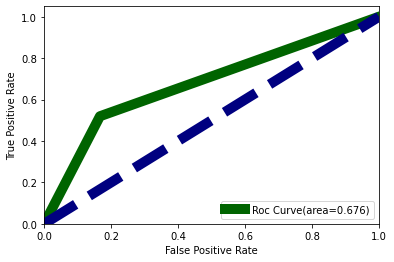

In [81]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(prid,Y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color="darkgreen",lw=10,label='Roc Curve(area=%0.3f)'%roc_auc)
plt.plot([0,1],[0,1],color="navy",lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

# Hyper Parameter Tuning

In [82]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth': np.arange(2,15),
             'criterion':['gini','entropy']}
GCV=GridSearchCV(DT,parameters,cv=5)
GCV.fit(x_train,Y_train)
print(GCV.best_params_)

{'criterion': 'entropy', 'max_depth': 5}


In [83]:
DT=DecisionTreeClassifier(criterion="entropy",max_depth=5)
DT.fit(x_train,Y_train)
DT.score(x_train,Y_train)
predict=DT.predict(x_test)
AC=accuracy_score(Y_test,predict)
print("DecisionTree Score :",AC*100)

cv_score=cross_val_score(DT,x,Y,cv=5)
cv_mean=cv_score.mean()
print("CV Score :",cv_mean*100)

DecisionTree Score : 81.61341016238869
CV Score : 79.31133804660905


# Model Saving

In [84]:
import pickle
filename='Churn_Prediction.pkl'
pickle.dump(RF,open(filename,'wb'))

# Conclusion

In [85]:
Loaded_load = pickle.load(open('Churn_Prediction.pkl','rb'))
Result=Loaded_load.score(x_test,Y_test)
print(Result)

0.8156102671555788


In [86]:
Conclusion=pd.DataFrame([Loaded_load.predict(x_test)[:],predict[:]],index=["Predicted","Original"])
Conclusion

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021

We have a the outcome for this model with 82%(rounded Off) score.